In [1]:
#dependencies i love dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [5]:
# Visit the Mars Temperature Data site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [23]:
#parse it
html = browser.html
html_soup = soup(html, 'html.parser')

In [56]:
table = html_soup.find('table', class_='table')

In [157]:
#get the headers
header_row = table.find('tr').find_all('th')
headers = []
for header in header_row:
    headers.append(header.text)

In [158]:
#get data put it in dataframe
df = pd.DataFrame()
mars_data = {}
rows = table.find_all('tr', class_='data-row')
for row in rows:
    row_data = row.find_all('td')
    for i in range(len(headers)):
        mars_data[headers[i]] = row_data[i].text
    df = df.append(mars_data,ignore_index=True)

In [161]:
#check types
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [162]:
#convert types
df['terrestrial_date']= pd.to_datetime(df['terrestrial_date'])
df['id'] = df['id'].astype('int')
df['sol'] = df['sol'].astype('int')
df['ls'] = df['ls'].astype('int')
df['month'] = df['month'].astype('int')
df['min_temp'] = df['min_temp'].astype('float')
df['pressure'] = df['pressure'].astype('float')

In [163]:
#check types
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [75]:
print("The amount of months on Mars is " + str(max(df['month'])) + ".")

The amount of months on Mars is 12.


In [77]:
print("The amount of Martian (and not Earth) days worth of data that exist in the scraped dataset is " + str(max(df['sol'])) + ".")

The amount of Martian (and not Earth) days worth of data that exist in the scraped dataset is 1977.


<AxesSubplot:xlabel='month'>

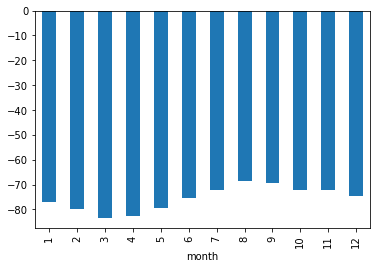

In [89]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)?
monthly_temp = df.groupby('month')['min_temp'].mean()
monthly_temp.plot.bar()

<AxesSubplot:xlabel='month'>

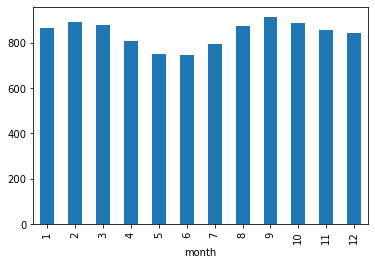

In [91]:
#Which months have the lowest and the highest atmospheric pressure on Mars?
monthly_pressure = df.groupby('month')['pressure'].mean()
monthly_pressure.plot.bar()

In [139]:
#to csv
df.to_csv('mars_weather_data.csv', index=False)

In [164]:
mintemps = {}
for i in range(len(df)):
    if df.loc[i,'month'] == 7:
        break
    mintemps[df.loc[i, 'terrestrial_date'].strftime("%x")] = df.loc[i, 'min_temp']
    df.drop(labels=i, inplace=True)

In [170]:
df = df.reset_index(drop=True)

In [171]:
for i in range(len(df)):
    if df.loc[i,'month'] == 6:
        break
    mintemps[df.loc[i, 'terrestrial_date'].strftime("%x")] = df.loc[i, 'min_temp']

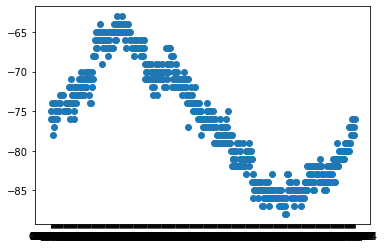

In [179]:
plt.scatter(mintemps.keys(),mintemps.values())